Changes : 

* The field monitor worked a little bit, when looking at specific small angles.
* When looking wide for a good angle, results polluted by "good" candidates that trap light in the grating and reemit everywhere.
* As such, try with fiber again. But this time only emit from waveguide.

So go back to 2D_1
So in compute, remove  the look over sources and hardcode 1 = waveguide.

In [1]:
from gc_outcoupler2 import initialize

Using MPI version 3.1, 1 processes


In [2]:
import argparse

parser = argparse.ArgumentParser()
parser.add_argument('-period', type=float, default=0.767723445279288, help='grating period (default: 0.767723445279288 um)')
parser.add_argument('-FF', type=float, default=0.5, help='Fill factor (default: 0.5 um)')
parser.add_argument('-theta', type=float, default=8, help='fiber_angle (default: 8 degrees)')    
parser.add_argument('-x', type=float, default=1, help='Fiber position (default: 1 um)')
parser.add_argument('-source', type=int, default=0, help='1 for waveguide, 0 for fiber')   
parser.add_argument('-filename', type=str, default='default', help='data name')  
args = parser.parse_args()
sim, fiber_monitor, waveguide_monitor = initialize(args)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000935078 s
Working in 2D dimensions.
Computational cell is 28.0469 x 11.6406 x 0 with resolution 64
     block, center = (1,0,0)
          size (120,100,0)
          axes (0.990268,-0.139173,0), (0.139173,0.990268,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.11285,2.11285,2.11285)
     block, center = (1,0,0)
          size (4,100,0)
          axes (0.990268,-0.139173,0), (0.139173,0.990268,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.12256,2.12256,2.12256)
     block, center = (0,1,0)
          size (1e+20,2,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,0.44,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (4.0409,4.0409,4.0409)
     block, center = (0.191931,0,0)
          size (0.383862,0.44,0)
          axes (1,0,0), (0,1,0),

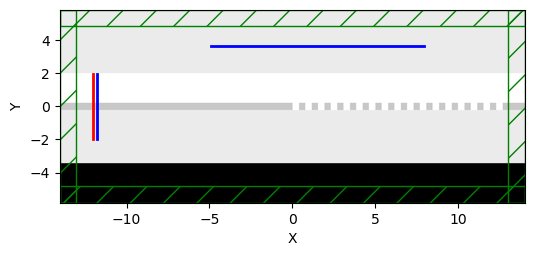

In [3]:
import matplotlib.pyplot as plt

f = plt.figure(dpi=100)
sim.plot2D(ax=f.gca())
plt.show()

In [4]:
import meep as mp

f = plt.figure(dpi=100)
animate = mp.Animate2D(sim,mp.Ez,f=f,normalize=True)
sim.run(mp.at_every(1,animate), until=100)
plt.close()

Meep progress: 1.0/100.0 = 1.0% done in 4.9s, 481.4s to go
on time step 128 (time=1), 0.0379925 s/step
Meep progress: 3.203125/100.0 = 3.2% done in 8.9s, 268.0s to go
on time step 410 (time=3.20312), 0.0141993 s/step
Meep progress: 5.3125/100.0 = 5.3% done in 12.9s, 229.5s to go
on time step 680 (time=5.3125), 0.0148452 s/step
Meep progress: 7.3515625/100.0 = 7.4% done in 16.9s, 212.7s to go
on time step 941 (time=7.35156), 0.0153334 s/step
Meep progress: 9.3671875/100.0 = 9.4% done in 20.9s, 202.1s to go
on time step 1199 (time=9.36719), 0.0155293 s/step
Meep progress: 11.359375/100.0 = 11.4% done in 24.9s, 194.3s to go
on time step 1454 (time=11.3594), 0.0157161 s/step
Meep progress: 13.3359375/100.0 = 13.3% done in 28.9s, 187.9s to go
on time step 1707 (time=13.3359), 0.0158676 s/step
Meep progress: 15.28125/100.0 = 15.3% done in 32.9s, 182.5s to go
on time step 1956 (time=15.2812), 0.0160681 s/step
Meep progress: 17.2265625/100.0 = 17.2% done in 36.9s, 177.4s to go
on time step 220

In [6]:
animate.to_jshtml(10)

In [7]:
res_waveguide = sim.get_eigenmode_coefficients(waveguide_monitor,
                                     [1],
                                     eig_parity=mp.ODD_Z,
                                     direction=mp.X)
kpoint = mp.Vector3(y=-1).rotate(mp.Vector3(z=1), -1*8)
res_fiber = sim.get_eigenmode_coefficients(fiber_monitor,
                                        [1],
                                        direction=mp.NO_DIRECTION,
                                        eig_parity=mp.ODD_Z,
                                        kpoint_func=lambda f,n: kpoint,
                                    )

MPB solved for frequency_1(3.16567,0,0) = 1.63681 after 18 iters
MPB solved for frequency_1(3.03845,0,0) = 1.57482 after 10 iters
MPB solved for frequency_1(3.03841,0,0) = 1.5748 after 3 iters
Dominant planewave for band 1: (3.038405,-0.000000,0.000000)
MPB solved for frequency_1(-0.989358,6.87285,0) = 0.687463 after 13 iters
MPB solved for frequency_1(-2.26638,15.7441,0) = 1.57477 after 10 iters
MPB solved for frequency_1(-2.26642,15.7443,0) = 1.5748 after 1 iters
Dominant planewave for band 1: (-2.266423,0.333312,0.000000)


In [8]:
res_waveguide.alpha

array([[[-5.10400674-3.89484102j, -1.59604266+0.3747213j ]]])

In [9]:
res_fiber.alpha

array([[[ 0.01688753+0.01684599j, -0.01180201-0.01128238j]]])

In [11]:
import numpy as np
np.abs(res_fiber.alpha[0,0,1])**2 / np.abs(res_waveguide.alpha[0,0,0])**2

6.4671310342748e-06

In [12]:
!mpirun -np 8 python gc_outcoupler2.py -period 0.767723445279288 -FF 0.5 -theta 8 -x 1 -source 1 -filename 'test' > ./logs/test.log

In [13]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir('./data') if isfile(join('./data', f))]

In [14]:
onlyfiles[0]

'test.pickle'

In [15]:
import pickle

dbfile = open('./data/' + onlyfiles[0], 'rb')
db = pickle.load(dbfile)
dbfile.close()

In [16]:
db

{'params': {'a': 0.767723445279288,
  'FF': 0.5,
  'theta': 8.0,
  'x': 1.0,
  'source': 1},
 'res_fiber': EigCoeffsResult(alpha=array([[[ 0.01750624+0.01695013j, -0.0122162 -0.01136083j]]]), vgrp=array([0.68740458]), kpoints=[Vector3<-2.266423113578978, 0.33331166013507385, 0.0>], kdom=[Vector3<-2.266423113578978, 0.33331166013507385, 0.0>], cscale=array([0.5])),
 'res_waveguide': EigCoeffsResult(alpha=array([[[-5.10375511-3.8943819j , -1.59861713+0.47528961j]]]), vgrp=array([0.48709218]), kpoints=[Vector3<3.0384245173138886, 0.0, 0.0>], kdom=[Vector3<3.0384245173138886, -0.0, 0.0>], cscale=array([0.50000052]))}

In [17]:
import numpy as np

db['res_fiber'].alpha

array([[[ 0.01750624+0.01695013j, -0.0122162 -0.01136083j]]])

In [18]:
np.abs(db['res_fiber'].alpha[0,0,1])**2 / np.abs(db['res_waveguide'].alpha[0,0,0])**2

1.4406940716480366e-05